# 11wk-40: Medical Cost / 의사결정나무의 시각화

최규빈  
2023-11-16

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wy5HZfyF9HIZKvAXrdBwzO&si=vTJ3EiJLr487p2DT>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import graphviz
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. 데이터준비 + 적합

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

In [10]:
# step1 
X = pd.get_dummies(df_train.loc[:,'age':'region'])
y = df_train['charges']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=3)
# step3 
predictr.fit(X,y)
# step4 -- pass 

# 4. matplotlib 기반 시각화

## A. 기본시각화

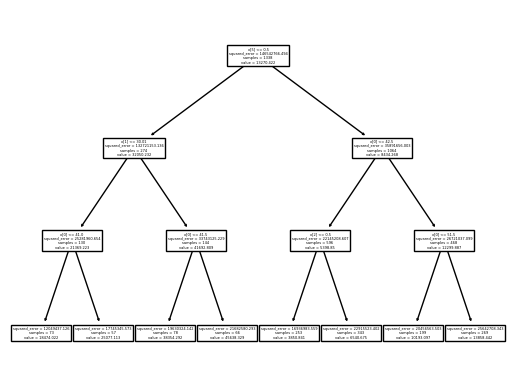

In [11]:
sklearn.tree.plot_tree(predictr);

-   잘 안보임

## B. max_depth 조정

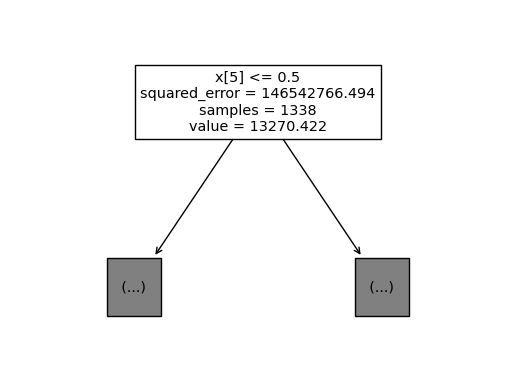

In [15]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=0
);

## C. 변수이름 추가

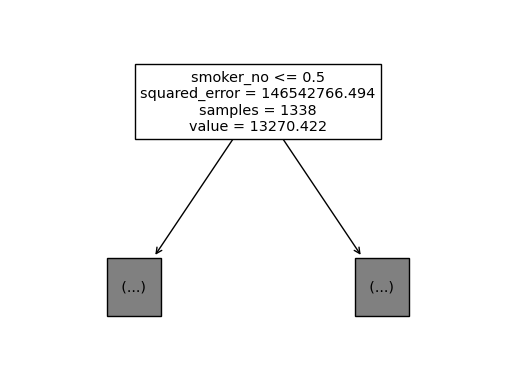

In [21]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=0,
    feature_names=X.columns
);

## D. fig 오브젝트

`-` `plt.gcf()`를 이용하여 fig 오브젝트 추출

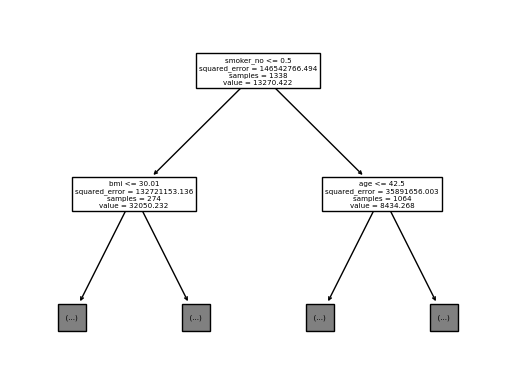

In [32]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=1,
    feature_names=X.columns
);
fig = plt.gcf()

`-` `fig.suptitle` 을 이용하여 제목을 붙일 수도 있지 않을까?

In [33]:
fig.suptitle("title??")

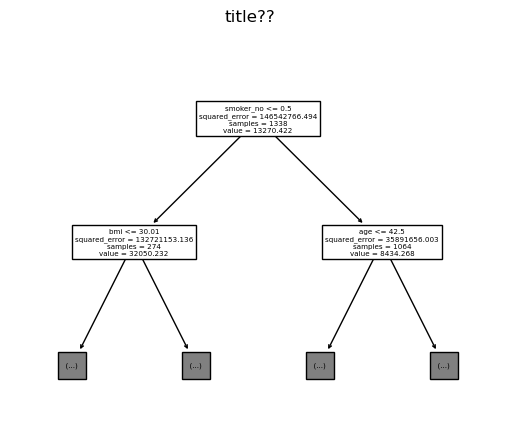

In [34]:
fig

`-` dpi 조정

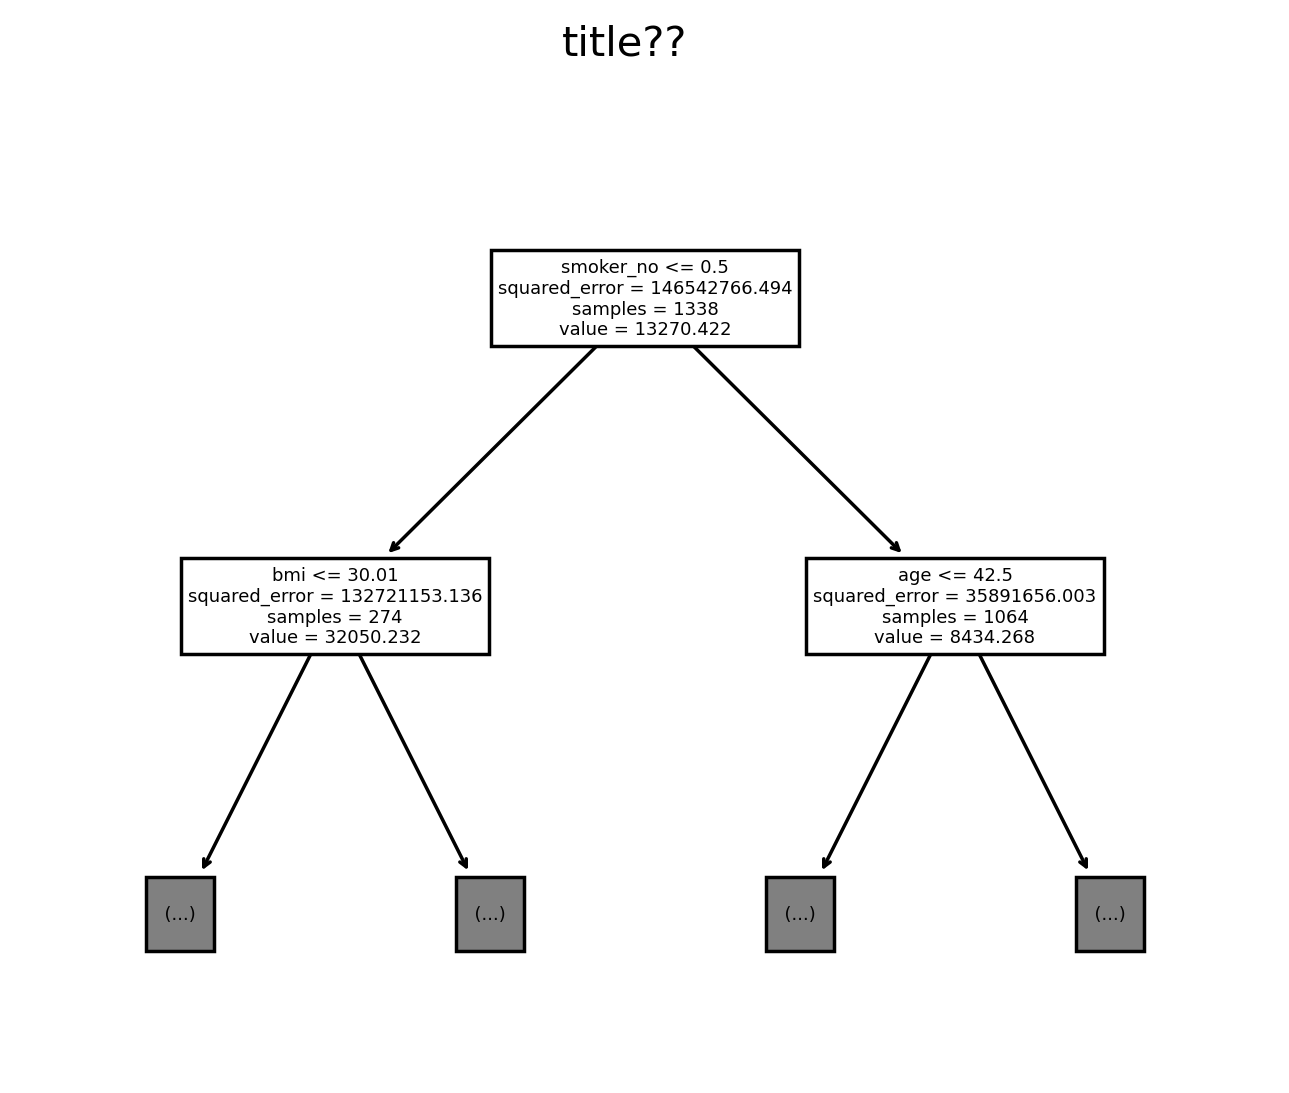

In [35]:
fig.set_dpi(250)
fig

## E. `matplotlib`의 ax에 그리기

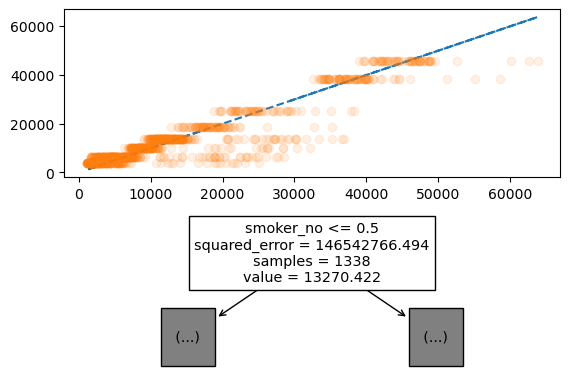

In [66]:
fig = plt.figure()
ax = fig.subplots(2,1)
ax[0].plot(y,y,'--')
ax[0].plot(y,predictr.predict(X),'o',alpha=0.1)
sklearn.tree.plot_tree(predictr,feature_names=X.columns,ax=ax[1],max_depth=0);

# 5. GraphViz 를 이용

In [69]:
g = sklearn.tree.export_graphviz(
    predictr,
    feature_names=X.columns
)

In [71]:
graphviz.Source(g)

-   보기에 훨씬 깔끔함

`-` 파일로 추출하여 저장하는 방법

In [72]:
g = sklearn.tree.export_graphviz(
    predictr,
    feature_names=X.columns
)
graphviz.Source(g).render('tree',format="pdf")

-   `tree.pdf` 이 생성되고 이 파일을 열면 tree의 구조를 쉽게 파악할 수
    있음.

# 6. HW

`tree.pdf` 파일을 제출